# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
w_api_key = "a69758f4b9d3c1958dd87d9419630040"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
units = "metric"

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={w_api_key}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | bria
Processing Record 4 of Set 1 | vacaria
Processing Record 5 of Set 1 | phongsali
Processing Record 6 of Set 1 | nyaunglebin
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | la passe
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | arawa
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | port douglas
Processing Record 14 of Set 1 | tashla
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | vernon
Processing Record 17 of Set 1 | tindouf
Processing Record 18 of Set 1 | jiuquan
Processing Record 19 of Set 1 | ust'-uda
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | margaret river
Processing 

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.70,90,100,12.37,TF,1710453803
1,puerto natales,-51.7236,-72.4875,5.04,95,100,4.14,CL,1710453803
2,bria,6.5423,21.9863,27.14,50,75,1.03,CF,1710453804
3,vacaria,-28.5122,-50.9339,20.27,74,30,1.77,BR,1710453704
4,phongsali,21.6833,102.1058,12.59,48,34,0.63,LA,1710453804


OSError: Cannot save file into a non-existent directory: 'output_data'

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

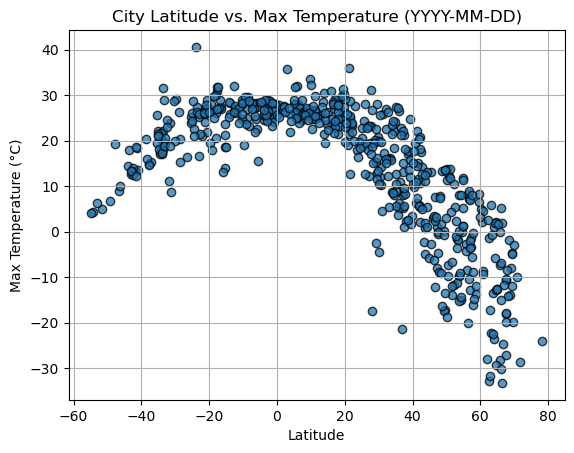

In [42]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)


# Show plot
plt.show()

#### Latitude Vs. Humidity

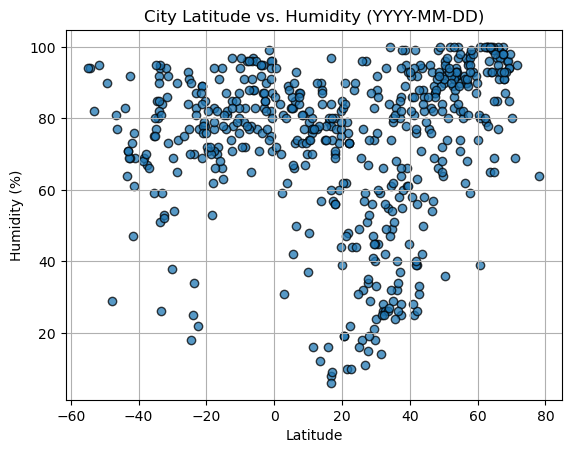

In [43]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

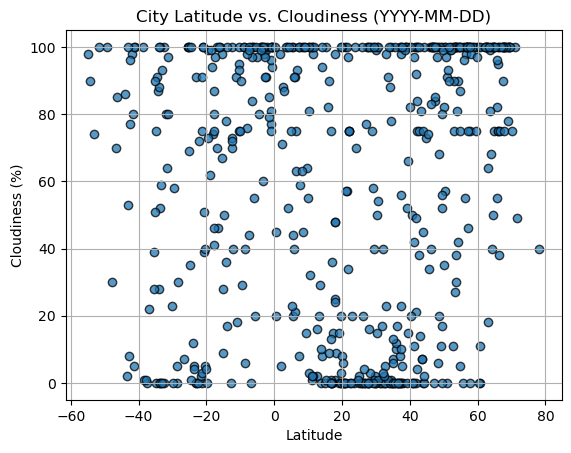

In [44]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

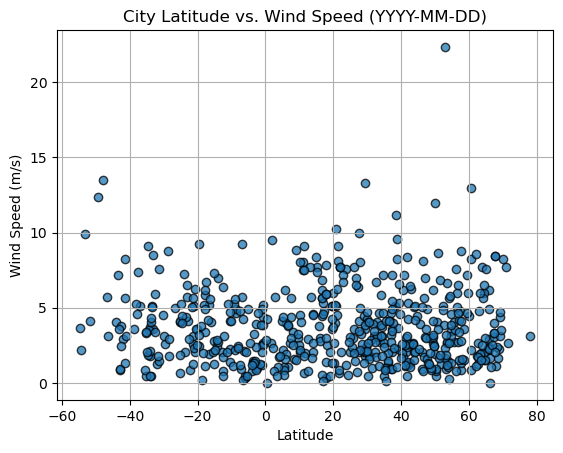

In [45]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (YYYY-MM-DD)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:

def plot_linear_regression(x_values, y_values, xlabel, ylabel):
    """
    Create a simple linear regression plot.

    Parameters:
    x_values (array-like): The x-values of the data points.
    y_values (array-like): The y-values of the data points.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.
    """
    # Perform linear regression
    (slope, intercept, _, _, _) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r")

    # Annotate the regression equation
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show plot
    plt.show()


In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,bria,6.5423,21.9863,27.14,50,75,1.03,CF,1710453804
4,phongsali,21.6833,102.1058,12.59,48,34,0.63,LA,1710453804
5,nyaunglebin,17.9500,96.7333,21.52,80,1,1.36,MM,1710453804
7,la passe,45.5549,-0.8967,13.13,77,34,3.89,FR,1710453804
9,bethel,41.3712,-73.4140,22.05,25,0,2.06,US,1710453804


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.70,90,100,12.37,TF,1710453803
1,puerto natales,-51.7236,-72.4875,5.04,95,100,4.14,CL,1710453803
3,vacaria,-28.5122,-50.9339,20.27,74,30,1.77,BR,1710453704
6,puerto ayora,-0.7393,-90.3518,26.98,96,100,2.68,EC,1710453804
8,grytviken,-54.2811,-36.5092,4.35,94,90,2.19,GS,1710453804


###  Temperature vs. Latitude Linear Regression Plot

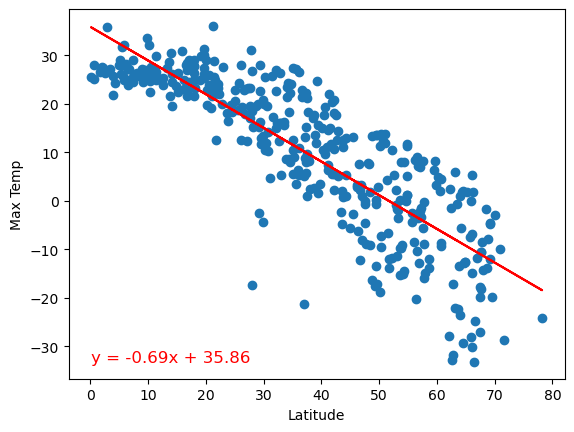

In [58]:
## Perform linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")


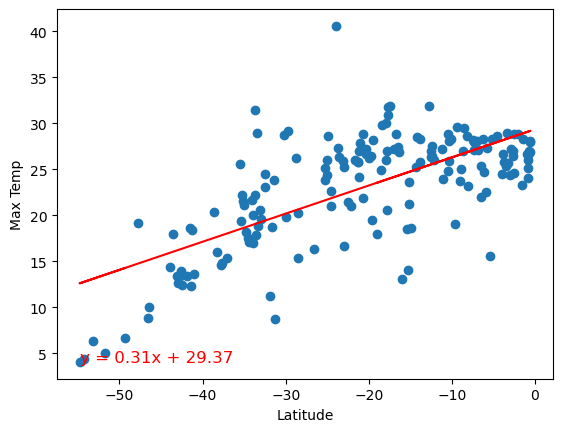

In [59]:
# Perform linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")


**Discussion about the linear relationship:** as you can see from the regression graphs the further the country is from the equator the lower the max tempreture is 

### Humidity vs. Latitude Linear Regression Plot

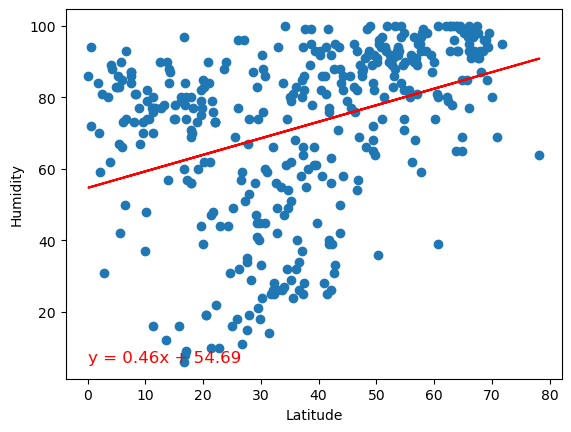

In [66]:
# Perform linear regression on Northern Hemisphere for Humidity vs Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")


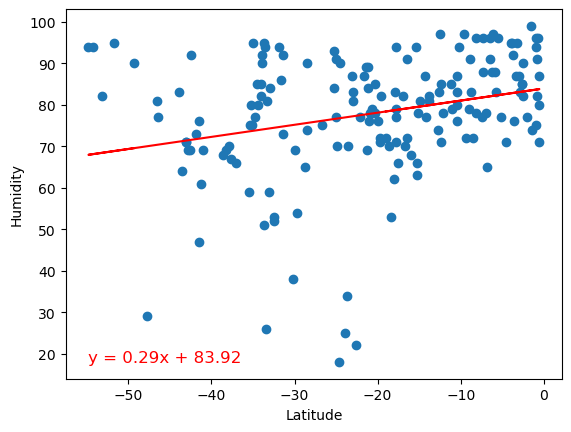

In [67]:
# Perform linear regression on Southern Hemisphere for Humidity vs Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")


**Discussion about the linear relationship:** the further you are from -50 lat on the southern hemisphere the higher the humidity will be with 80 lat on the northen being the highest 

### Cloudiness vs. Latitude Linear Regression Plot

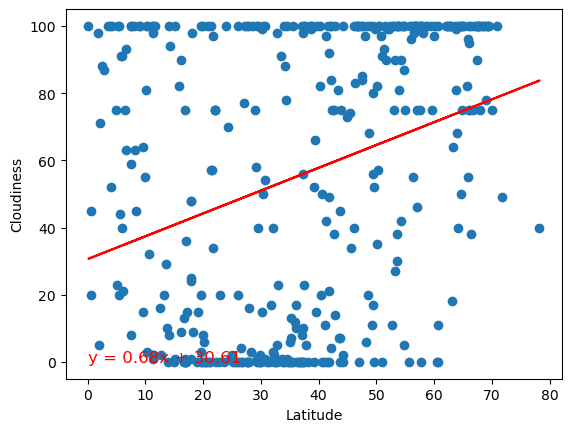

In [68]:
# Perform linear regression on Northern Hemisphere for Cloudiness vs Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")


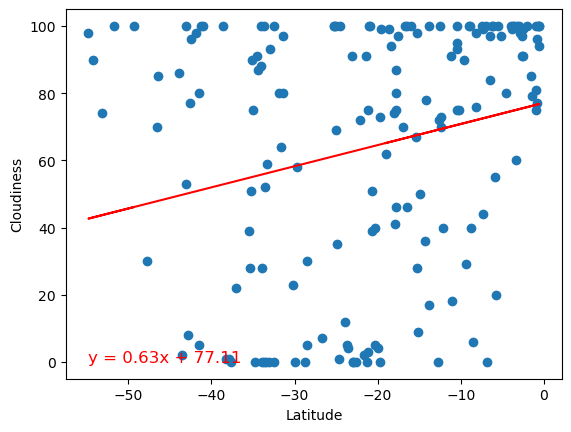

In [69]:
# Perform linear regression on Southern Hemisphere for Cloudiness vs Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")


**Discussion about the linear relationship:** there is no real coreleation to cloudyness between the hemispheres but in each individual hemisphere (southern) - the further you are from the equator the clouder it will be with the inverse for the northen  hemisphere 

### Wind Speed vs. Latitude Linear Regression Plot

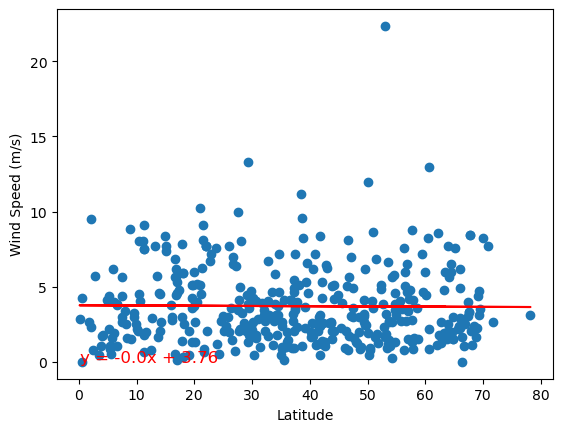

In [70]:
# linear regression on Northern Hemisphere for Wind Speed vs Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)")


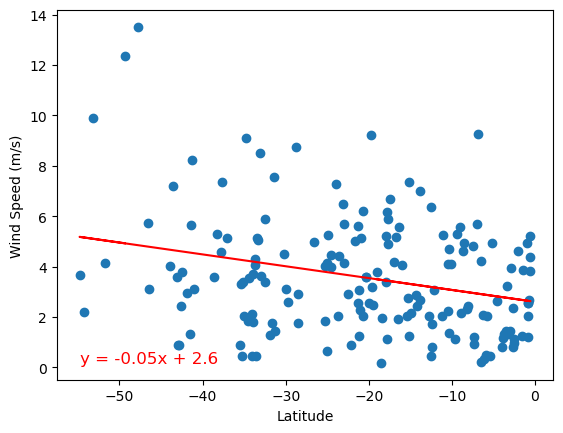

In [71]:
# Perform linear regression on Southern Hemisphere for Wind Speed vs Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)")


**Discussion about the linear relationship:** YOUR RESPONSE HERE